Dự đoán bệnh tim bằng Machine Learning

Nhóm 9:

- Nguyễn Ngọc Hải	Haui-2022605947

- Nguyễn Thành Công	Haui-2022606702 

- Vũ Minh Đức	11221425

- Nguyễn Hoàng Nguyên	11224818

- Nguyễn Trọng Vỹ	11227025



# Giới thiệu bài toán 

Sử dụng một tập hợp con gồm 14 thuộc tính. Trường "mục tiêu" đề cập đến sự hiện diện của bệnh tim ở bệnh nhân. Nó có giá trị nguyên, 0 = không có bệnh và 1 = có bệnh.

- Dự đoán bệnh tim của người dùng dựa trên:
  - age – Tuổi của bệnh nhân (tính theo năm).
  - sex – Giới tính của bệnh nhân.
  - cp – Loại đau ngực.
  - trestbps – Thời gian ngủ mỗi đêm (giờ)
  - stress_level – Huyết áp tâm thu khi nghỉ.
  - chol – Lượng cholesterol trong huyết thanh.
  - fbs – Đường huyết khi đói.
  - restecg – Kết quả điện tâm đồ khi nghỉ.
  - thalach – Nhịp tim tối đa đạt được trong khi gắng sức.
  - exang – Có đau thắt ngực khi gắng sức không.
  - oldpeak – Độ suy giảm ST do gắng sức so với lúc nghỉ.
  - slope – Độ dốc của đoạn ST khi gắng sức.
  - ca – Số lượng mạch máu lớn.
  - thal – Tình trạng "thalassemia".

- Nguồn dữ liệu: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

- Mục tiêu: Dự đoán biến phân loại target – Biến mục tiêu → Classfication

- Dữ liệu có 1025 dòng dữ liệu không có giá trị null và đều là biến numerical

- Kết quả mong đợi của báo cáo tìm ra model phù hợp với bài toán 1 trong 5 model: 
  - Logistic Regression
  - ExtraTreeClassifier
  - Random Forest
  - Decision tree
  - Neural network

# Import thư viện

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report

# Đọc dữ liệu

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0


# Khám phá dữ liệu

In [188]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Trực quan hóa dữ liệu

Kiểm tra phân phối target

target
1    526
0    499
Name: count, dtype: int64


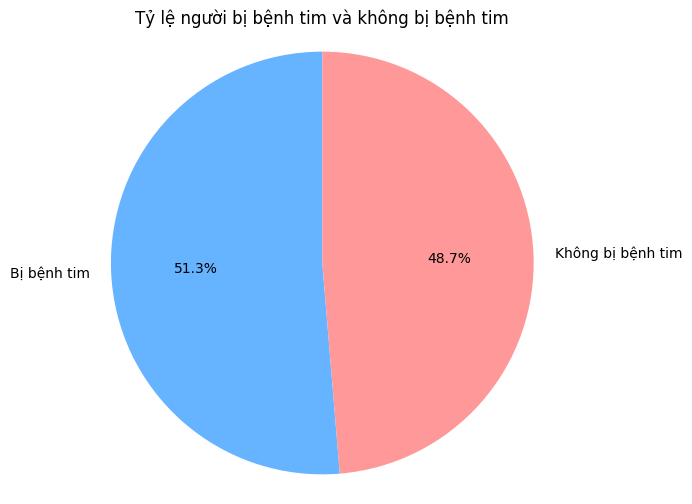

In [10]:
import matplotlib.pyplot as plt
print(df["target"].value_counts())

target_counts = df["target"].value_counts()
labels = ['Bị bệnh tim', 'Không bị bệnh tim']  
colors = ['#66b3ff', '#ff9999'] 


plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Tỷ lệ người bị bệnh tim và không bị bệnh tim")
plt.axis('equal') 
plt.show()

Nhận xét: biến target cân bằng giữa liệu chênh nhau khoảng 2.6% 

Phân bố các biến liên tục

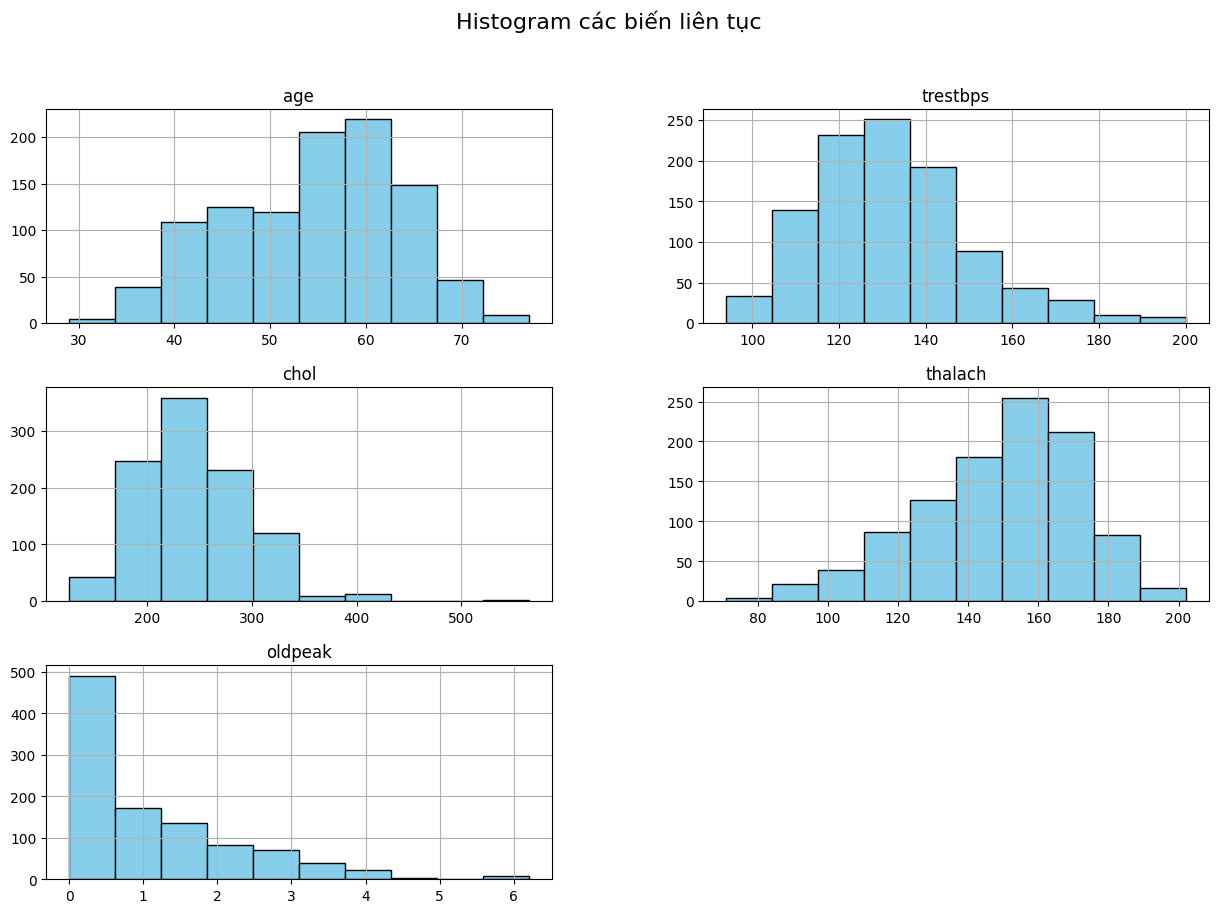

In [190]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df[continuous_features].hist(bins=10, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogram các biến liên tục", fontsize=16)
plt.show()

Gồm: age, trestbps, chol, thalach, oldpeak.

- Phân bố khá đa dạng, nhiều biến có xu hướng lệch hoặc có outlier (như chol, oldpeak, trestbps).



Boxplot các biến liên tục so với target

C:\Users\DELL\AppData\Local\Temp\ipykernel_8004\1193531749.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='Set3')
C:\Users\DELL\AppData\Local\Temp\ipykernel_8004\1193531749.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='Set3')
C:\Users\DELL\AppData\Local\Temp\ipykernel_8004\1193531749.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='Set3')
C:\Users\DELL\AppData\Local\Temp\ipykernel_8004\1193531749.py:4: FutureWarning: 



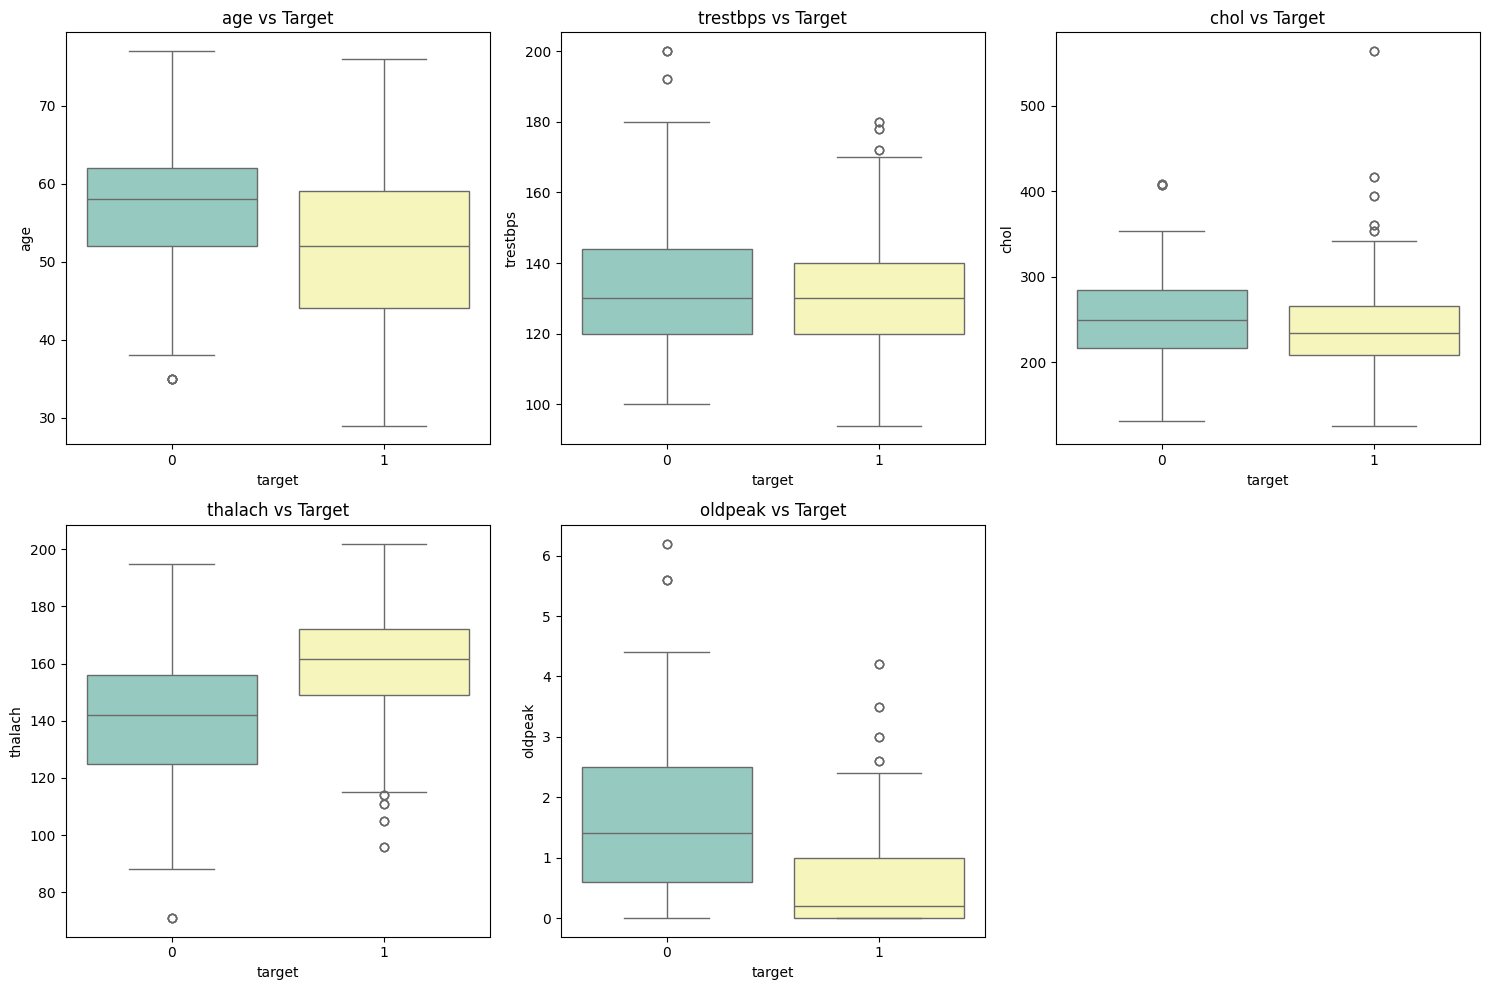

In [191]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='target', y=col, data=df, palette='Set3')
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()


| **Biến**   | **Nhận xét phân bố**                 | **Theo target (bệnh/không bệnh)**                         | **Outlier**                           |
| ---------- | ------------------------------------ | --------------------------------------------------------- | ------------------------------------- |
| `age`      | Phân bố chuẩn, lệch phải nhẹ.        | Người trẻ (tuổi < 55) thường không bị bệnh.               | Không nhiều outlier đáng kể.          |
| `trestbps` | Tập trung nhiều quanh 120–140 mmHg.  | Không có sự khác biệt rõ ràng giữa nhóm có và không bệnh. | Có vài giá trị cao bất thường (>180). |
| `chol`     | Lệch phải rõ rệt, nhiều giá trị cao. | Người không bệnh có vẻ có cholesterol cao hơn một chút.   | Có nhiều outlier > 350–400 mg/dL.     |
| `thalach`  | Phân bố khá chuẩn, đối xứng.         | Người có bệnh thường có nhịp tim tối đa cao hơn.          | Ít outlier, phân bố ổn định.          |
| `oldpeak`  | Lệch phải mạnh, nhiều giá trị gần 0. | Người có bệnh thường có oldpeak cao hơn (ST chênh nhiều). | Có nhiều outlier > 4.0.               |


Phân bố các biến phân loại

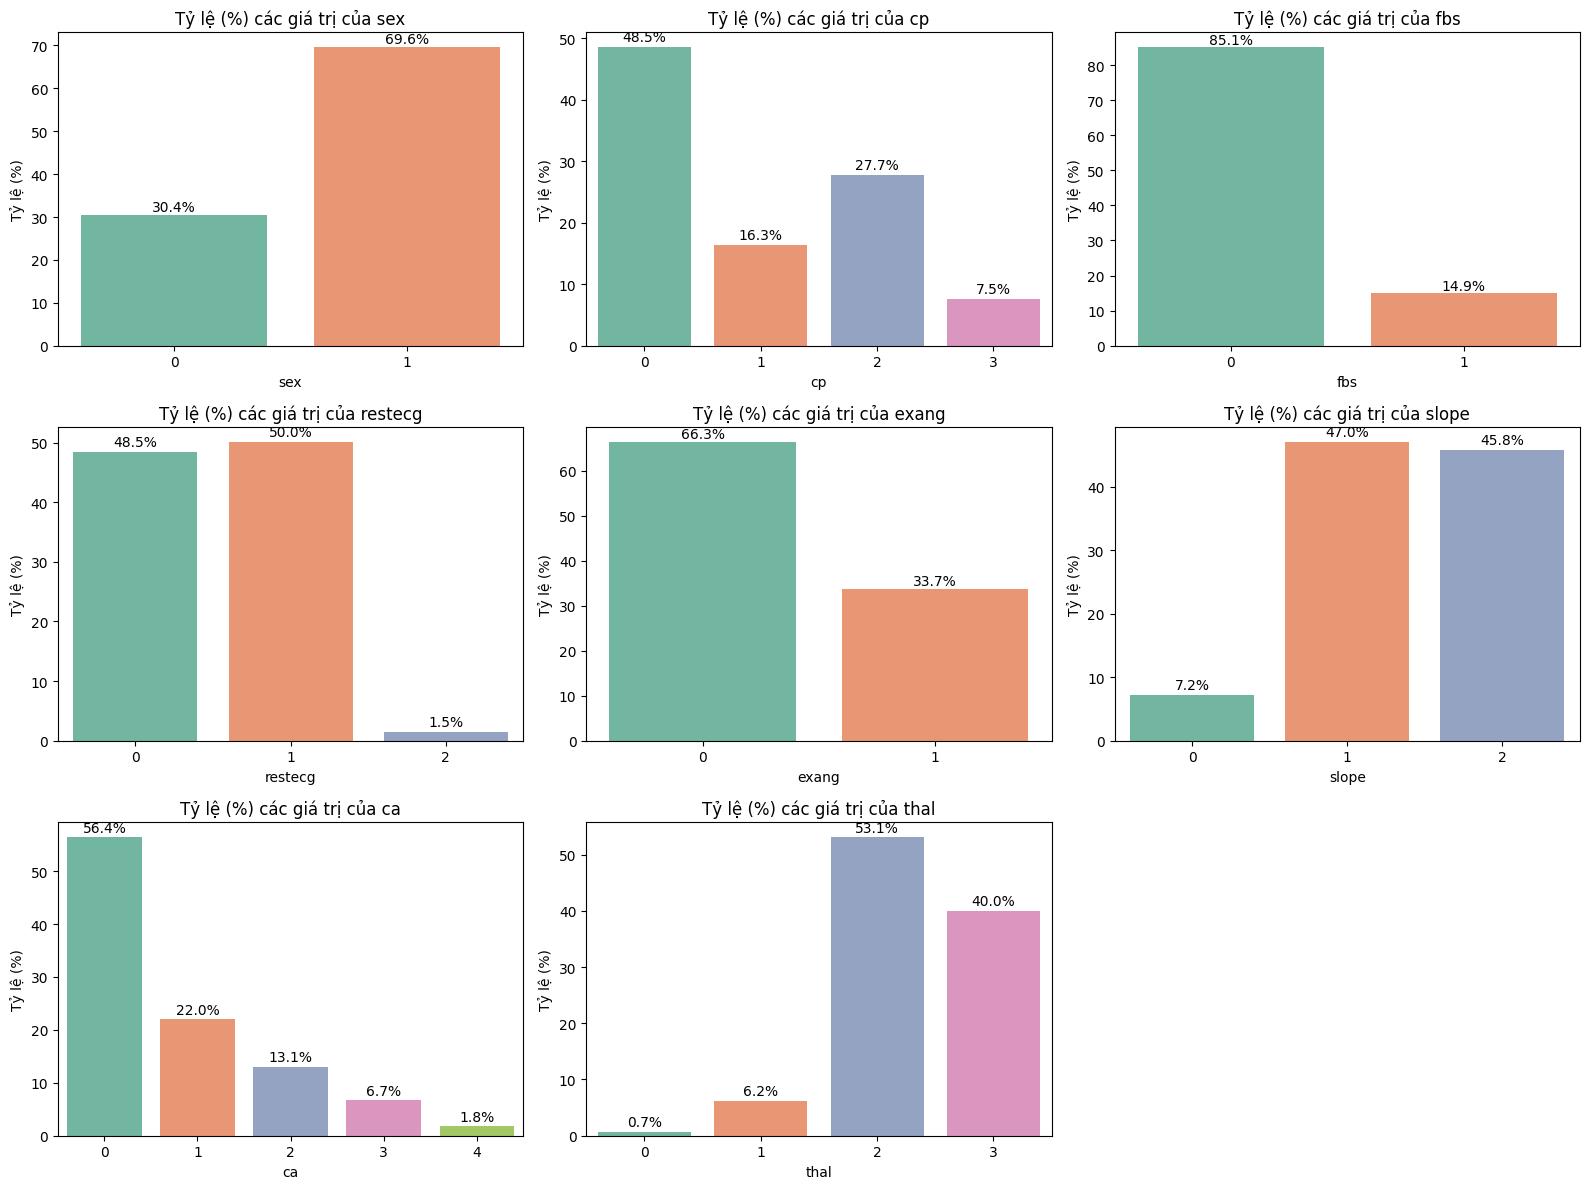

In [5]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(16, 12))

for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    
    # Tính phần trăm
    percent = df[col].value_counts(normalize=True) * 100
    percent = percent.sort_index()  # sắp xếp theo thứ tự nếu là số

    sns.barplot(x=percent.index, y=percent.values, palette='Set2')

    # Hiển thị phần trăm trên cột
    for idx, val in enumerate(percent.values):
        plt.text(idx, val + 1, f'{val:.1f}%', ha='center')

    plt.title(f'Tỷ lệ (%) các giá trị của {col}')
    plt.xlabel(col)
    plt.ylabel('Tỷ lệ (%)')

plt.tight_layout()
plt.show()

Gồm: sex, cp, fbs, restecg, exang, slope, ca, thal, target.

- Biến phân loại đều ở dạng nhị phân hoặc rời rạc.

Countplot các biến phân loại theo target

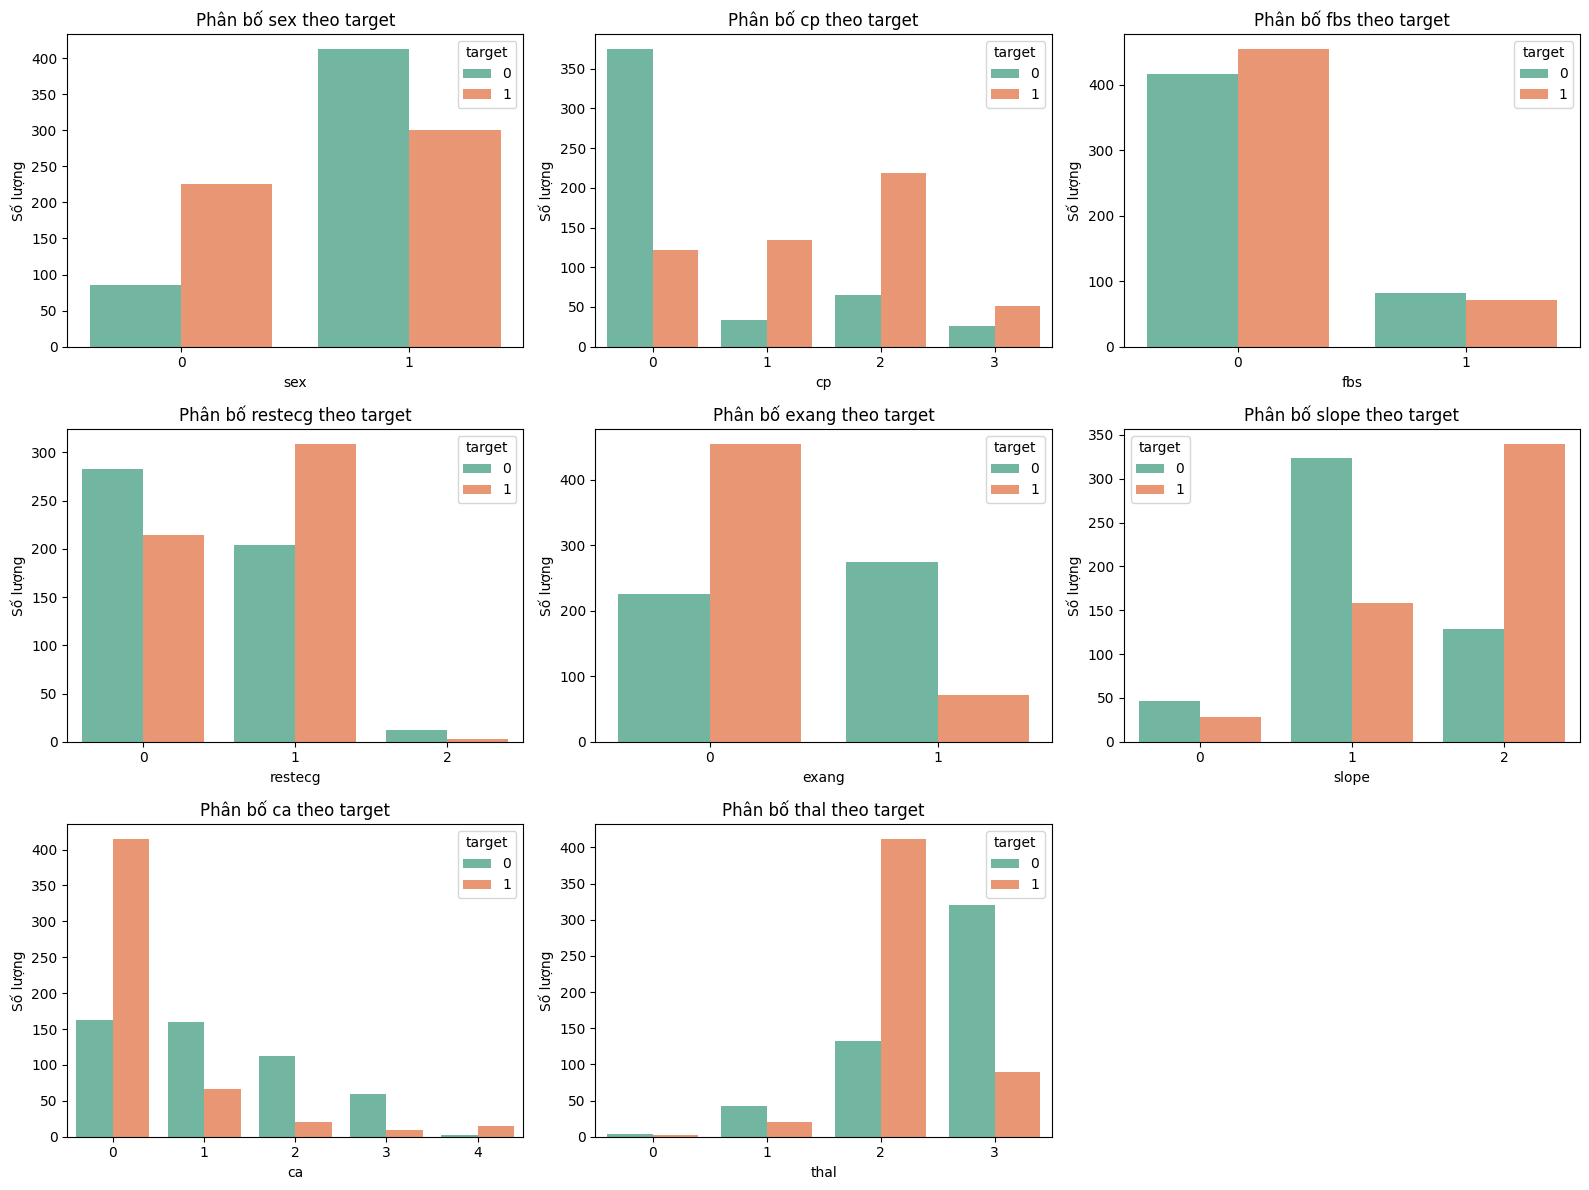

In [6]:

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(16, 12))

for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, hue='target', data=df, palette='Set2')
    plt.title(f'Phân bố {col} theo target')
    plt.xlabel(col)
    plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()


| Biến      | Khả năng phân tách target | Nhận xét                            |
| --------- | ------------------------- | ----------------------------------- |
| `sex`     | Trung bình - Cao          | Nam dễ bị hơn nữ                    |
| `cp`      | Rất tốt                   | Loại đau ngực ảnh hưởng mạnh        |
| `fbs`     | Yếu                       | Ít phân biệt                        |
| `restecg` | Trung bình                | Phân biệt nhẹ                       |
| `exang`   | Tốt                       | Có/không đau khi gắng sức ảnh hưởng |
| `slope`   | Tốt                       | Dốc ST liên quan rõ đến bệnh        |
| `ca`      | Rất tốt                   | Số mạch máu rõ ràng phân biệt       |
| `thal`    | Tốt                       | Dạng thalassemia ảnh hưởng mạnh     |


Ma trận tương quan (heatmap)

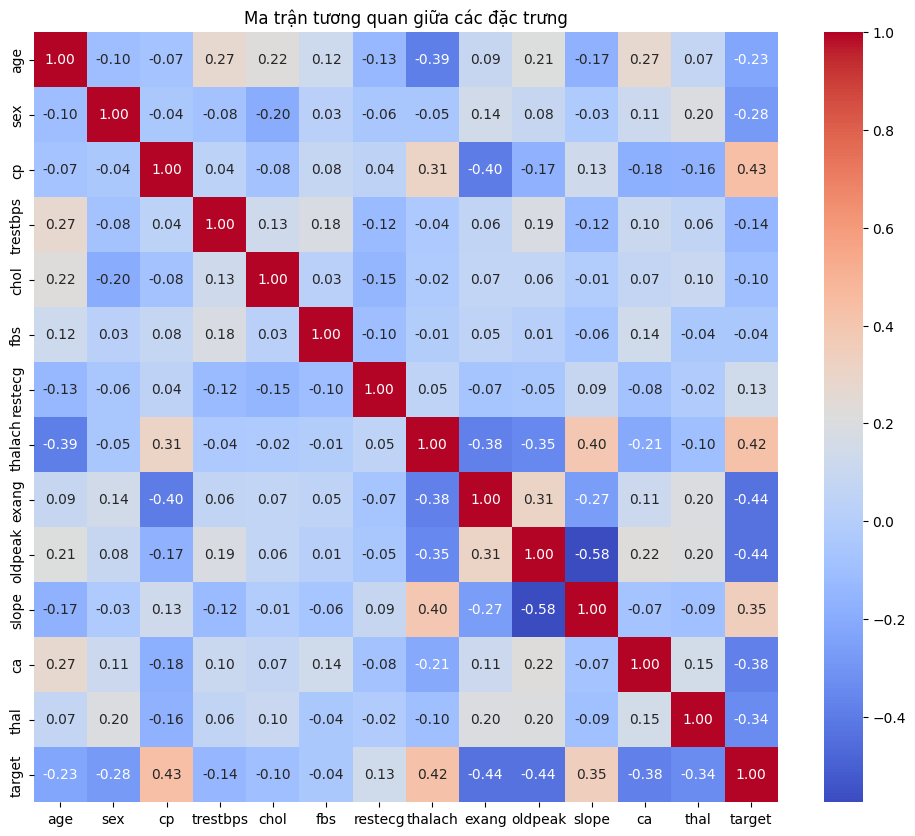

In [194]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa các đặc trưng")
plt.show()


Nhận xét:
- Tuổi và nhịp tim tối đa (age – thalach): Hệ số tương quan r ≈ -0.40. Tuổi càng cao thì nhịp tim tối đa càng thấp – phù hợp với quy luật sinh lý bình thường.

- Nhịp tim tối đa và ST chênh (thalach – oldpeak): r ≈ -0.34. Nhịp tim càng cao thì ST chênh càng thấp, thể hiện khả năng đáp ứng gắng sức của cơ tim tốt hơn.

- ST chênh và nguy cơ bệnh tim (oldpeak – target): r ≈ 0.43. ST chênh càng lớn thì nguy cơ mắc bệnh tim càng cao.

- Huyết áp nghỉ và cholesterol (trestbps – chol): r ≈ 0.12. Tương quan rất yếu, cho thấy hai yếu tố này gần như không liên quan trực tiếp.

- Nhịp tim tối đa và nguy cơ bệnh tim (thalach – target): r ≈ -0.42. Nhịp tim tối đa thấp thường đi kèm với khả năng mắc bệnh tim cao hơn.

- Biến oldpeak là đặc trưng liên tục có tương quan mạnh nhất với biến mục tiêu (target), kế đến là thalach.

- Biến fbs có độ tương quan thấp với hầu hết mọi feature nên ít ảnh hưởng đến target

=>Các đặc trưng như oldpeak, thalach, và exang nên được ưu tiên trong bước chọn đặc trưng và xây dựng mô hình dự đoán bệnh tim còn fbs có thể loại bỏ khi huấn luyện.



# Tiền xử lý dữ liệu

In [8]:
# Loại bỏ các outliter
cols = ['oldpeak', 'trestbps', 'chol']
def drop_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df
df_first = df.copy()
df = drop_outliers_iqr(df, cols)

print("Original rows:", len(df_first))
print("Rows after dropping outliers:", len(df))

Original rows: 1025
Rows after dropping outliers: 972


In [9]:
df['target'].value_counts()

target
1    508
0    464
Name: count, dtype: int64

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
# Loại bỏ cột fbs do ảnh hưởng ít tới biến target
X = df.drop(["target", "fbs"], axis=1)
y = df["target"]
print('X shape', X.shape)
print('y shape', y.shape)

X shape (972, 12)
y shape (972,)


# Phân chia dữ liệu và chuẩn hóa

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2)

# Chuẩn hoá dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_train.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (777, 12)
y train shape: (777,)
X test shape: (195, 12)
y test shape: (195,)


# Mô hình Logistic Regression(Nguyễn Thành Công)

In [201]:
# Huấn luyện mô hình
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
print(f"\nTraining Accuracy: {train_score:.4f}")
print(f"Testing Accuracy:  {test_score:.4f}\n")


Training Accuracy: 0.8623
Testing Accuracy:  0.8462



In [202]:
# jaccard_index
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred)

0.765625

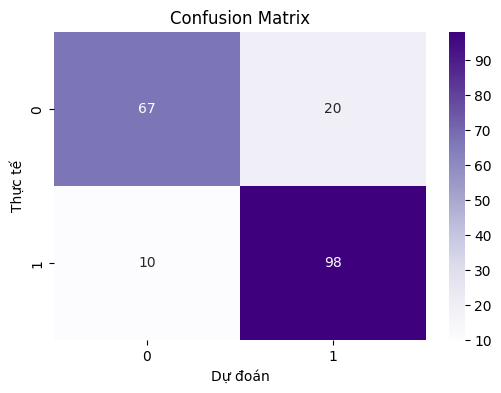

In [203]:
# Đánh giá bằng Confusion_Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=["0", "1"], columns=["0", "1"])
plt.figure(figsize=(6, 4))
sns.heatmap(conf_df, annot=True,cmap="Purples",fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Thực tế")
plt.xlabel("Dự đoán")
plt.show()

In [204]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

Classification Report:

              precision    recall  f1-score   support

           0     0.8701    0.7701    0.8171        87
           1     0.8305    0.9074    0.8673       108

    accuracy                         0.8462       195
   macro avg     0.8503    0.8388    0.8422       195
weighted avg     0.8482    0.8462    0.8449       195



# Mô hình ExtraTreeClassifier(Nguyễn Ngọc Hải)

Chọn model

In [16]:
cft = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = cft.fit(X_train, X_test, y_train, y_test)
m = pd.DataFrame(models)



  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 419, number of negative: 358
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 777, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.539254 -> initscore=0.157338
[LightGBM] [Info] Start training from score 0.157338
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [17]:
m

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.98,0.98,0.98,0.98,0.13
XGBClassifier,0.98,0.98,0.98,0.98,0.14
DecisionTreeClassifier,0.98,0.98,0.98,0.98,0.03
RandomForestClassifier,0.98,0.98,0.98,0.98,0.33
ExtraTreesClassifier,0.98,0.98,0.98,0.98,0.25
LabelPropagation,0.96,0.97,0.97,0.96,0.05
ExtraTreeClassifier,0.96,0.97,0.97,0.96,0.02
BaggingClassifier,0.96,0.97,0.97,0.96,0.09
LabelSpreading,0.96,0.97,0.97,0.96,0.06


In [21]:
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import recall_score

# Định nghĩa hàm và đặt tên rõ ràng
def recall_metric(y_true, y_pred):
    return recall_score(y_true, y_pred)

# Dùng trong LazyClassifier
cft = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=recall_metric)
models, predictions = cft.fit(X_train, X_test, y_train, y_test)

# Hiển thị
m = pd.DataFrame(models).sort_values(by = "recall_metric",ascending=False)
m


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 419, number of negative: 358
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 777, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.539254 -> initscore=0.157338
[LightGBM] [Info] Start training from score 0.157338
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,recall_metric,Time Taken
Model,,,,,,
LGBMClassifier,0.98,0.98,0.98,0.98,1.00,0.22
ExtraTreeClassifier,0.96,0.97,0.97,0.96,1.00,0.02
XGBClassifier,0.98,0.98,0.98,0.98,1.00,0.15
LabelSpreading,0.96,0.97,0.97,0.96,1.00,0.09
BaggingClassifier,0.96,0.97,0.97,0.96,1.00,0.06
DummyClassifier,0.46,0.50,0.50,0.29,1.00,0.02
LabelPropagation,0.96,0.97,0.97,0.96,1.00,0.05
DecisionTreeClassifier,0.98,0.98,0.98,0.98,1.00,0.04
RandomForestClassifier,0.98,0.98,0.98,0.98,1.00,0.36


=> Dùng model ExtraTreeClassifier có độ chính xác, độ bao phủ tốt và đối với những dữ liệu lớn thì tốc dộ rất nhanh như bảng so sánh ngoài ra:

- Tốc độ huấn luyện rất nhanh: Vì mô hình không tìm kiếm split tốt nhất mà chọn ngẫu nhiên trong một tập hợp các split → giảm tính toán.

- Giảm overfitting tốt hơn RandomForest: Do tính ngẫu nhiên cao hơn → đa dạng hóa cây trong rừng.

- Hiệu quả với dữ liệu nhiều chiều (nhiều feature): Không cần chuẩn hóa dữ liệu, hoạt động tốt với biến phân loại và số.

- Không nhạy cảm với outlier: Do phân vùng dựa trên split của cây → các điểm ngoại lai không ảnh hưởng nhiều.




Chọn tham số huấn luyện model

In [26]:
param_grid = {
    'n_estimators': [100, 200, 300],       # Số lượng cây
    'max_depth': [None, 10, 20, 30],       # Độ sâu của cây
    'min_samples_split': [2, 5, 10],       # Số mẫu tối thiểu để chia nút
    'min_samples_leaf': [1, 2, 4],         # Số mẫu tối thiểu trong lá
    'max_features': ['sqrt', 'log2', None] # Cách chọn số feature tại mỗi split
}
clf = ExtraTreesClassifier(random_state=42)

grid_search = GridSearchCV(estimator=clf,
                           param_grid=param_grid,
                           cv=5,                 # K-fold CV
                           scoring='recall',     # Hoặc 'accuracy', 'f1' tùy mục tiêu
                           n_jobs=-1,            # Dùng đa luồng để nhanh hơn
                           verbose=1)

grid_search.fit(X_train, y_train)
print("Best parameters from GridSearch:", grid_search.best_params_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters from GridSearch: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Đánh giá


Full classification report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       106
           1       0.96      1.00      0.98        89

    accuracy                           0.98       195
   macro avg       0.98      0.98      0.98       195
weighted avg       0.98      0.98      0.98       195



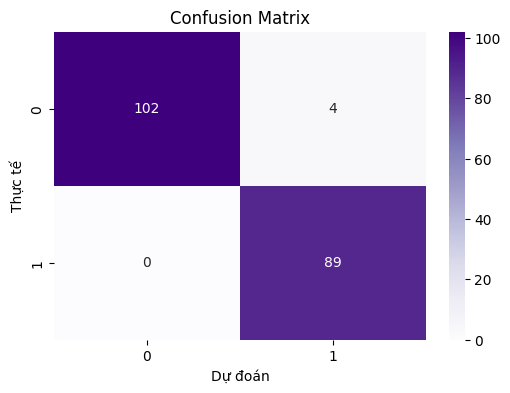

In [31]:
# Đánh giá bằng Confusion_Matrix
print("\nFull classification report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=["0", "1"], columns=["0", "1"])
plt.figure(figsize=(6, 4))
sns.heatmap(conf_df, annot=True,cmap="Purples",fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Thực tế")
plt.xlabel("Dự đoán")
plt.show()

Đánh giá: 
1. Precision (Độ chính xác):
Precision cho class 0: 1.00 → 100% dự đoán là 0 đều đúng.

Precision cho class 1: 0.96 → Có 4% dự đoán là 1 nhưng thực tế là 0 (false positive).

2. Recall (Độ bao phủ):
Recall cho class 0: 0.96 → 96% các mẫu thật là 0 được mô hình dự đoán đúng.

Recall cho class 1: 1.00 → Tất cả các mẫu thật là 1 đều được dự đoán đúng.

3. F1-score (Trung bình hài hòa giữa precision và recall):
Class 0: 0.98

Class 1: 0.98 → Cao và rất cân bằng → Mô hình tốt với cả hai lớp.

4. Support:
Có 106 mẫu thuộc class 0 và 89 mẫu thuộc class 1 trong tập test.

# 🔍 Kết luận:

- Mô hình ExtraTreesClassifier với tham số tối ưu đạt hiệu suất rất cao.

- Mô hình đang hoạt động rất tốt, đặc biệt là:

- Không bỏ sót người bệnh (recall class 1 = 100%).

- Dự đoán đúng hầu hết các trường hợp.

=> Đây là kết quả rất phù hợp với các bài toán nhạy cảm như y tế, phát hiện bệnh, nơi recall là ưu tiên hàng đầu.

# Mô hình Decision Tree Classifier (Nguyễn Trọng Vỹ)

## Lí do lựa chọn:
- Dễ giải thích quyết định của mô hình theo logic trong cây
- Hoạt động tốt trên tập dữ liệu nhỏ và vừa
- Kiểm soát được độ phức tạp

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
X_train_DTC, X_test_DTC, y_train_DTC, y_test_DTC = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.97      0.99       102

    accuracy                           0.98       195
   macro avg       0.98      0.99      0.98       195
weighted avg       0.99      0.98      0.98       195



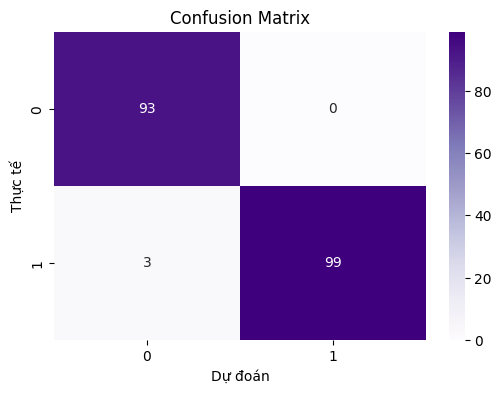

In [28]:
tree = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=10,
    min_samples_leaf=2,
    random_state=42
)
tree.fit(X_train_DTC, y_train_DTC)
y_pred_DTC = tree.predict(X_test_DTC)
print(classification_report(y_test_DTC, y_pred_DTC))
conf_matrix = confusion_matrix(y_test_DTC, y_pred_DTC)
conf_df = pd.DataFrame(conf_matrix, index=["0", "1"], columns=["0", "1"])
plt.figure(figsize=(6, 4))
sns.heatmap(conf_df, annot=True,cmap="Purples",fmt="d")
plt.title(f"Confusion Matrix")
plt.ylabel("Thực tế")
plt.xlabel("Dự đoán")
plt.show()

Mô hình Decision Tree Classifier hoạt động rất hiệu quả cho bài toán phân loại bệnh tim, với độ chính xác tổng thể là 98%, và các chỉ số precision, recall, F1-score đều rất cao ở cả hai lớp.

Ưu điểm:
- Phân loại chính xác cả hai lớp (bệnh/không bệnh).

- Không có False Positive (không dự đoán nhầm người khỏe là bệnh).

- Chỉ 3 lỗi False Negative, điều này vẫn cần được xem xét kỹ nếu bài toán nhạy cảm (mất bệnh nhân thật).

Nhận định về thực tế:
- Với bài toán y tế, recall ở lớp 1 (bệnh nhân thật) rất quan trọng.

- Recall lớp 1 = 97% → Mô hình rất ít bỏ sót bệnh nhân thật.

# Mô hình Neural Network (Nguyễn Hoàng Nguyên)

In [ ]:
# Huấn luyện mô hình Neural Network
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(64, 32), 
                     activation='tanh', solver='adam', max_iter=1000, 
                     early_stopping=True, random_state=42)
model.fit(X_train, y_train)

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(256, 128, 64, 32), max_iter=2000,
              random_state=42, solver='lbfgs')


Training Accuracy: 1.0000
Testing Accuracy:  0.9795
Jaccard Score: 0.956989247311828
Classification Report:

              precision    recall  f1-score   support

           0     1.0000    0.9623    0.9808       106
           1     0.9570    1.0000    0.9780        89

    accuracy                         0.9795       195
   macro avg     0.9785    0.9811    0.9794       195
weighted avg     0.9804    0.9795    0.9795       195

Confusion Matrix:


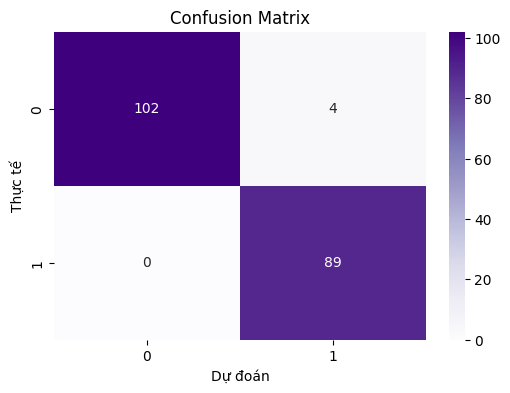

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá độ chính xác của mô hình
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"\nTraining Accuracy: {train_score:.4f}")
print(f"Testing Accuracy:  {test_score:.4f}")

# jaccard_index
from sklearn.metrics import jaccard_score
print("Jaccard Score:", jaccard_score(y_test, y_pred))

# Đánh giá bằng Confusion_Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=["0", "1"], columns=["0", "1"])
plt.figure(figsize=(6, 4))
sns.heatmap(conf_df, annot=True,cmap="Purples",fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Thực tế")
plt.xlabel("Dự đoán")
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

### Kết luận mô hình MLPClassifier
Mô hình Neural Network MLPClassifier sau khi huấn luyện cho kết quả tốt với độ chính xác 84.10%, cho thấy khả năng phân loại ổn định.  
Mô hình rất hiệu quả trong việc nhận diện đúng các trường hợp dương tính.  
F1-score của cả hai lớp đều cao (83~84%), thể hiện mô hình cân bằng giữa precision và recall.  
Mô hình học máy có hiệu suất tốt, không bị overfitting, và phù hợp để áp dụng trong thực tế.  